# Import Libraries
______________________________________________

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Dataset Features
- **`Id` : ID.**
- **`battery_power` : Total energy a battery can store in one time measured in mAh.**
- **`blue` : Has bluetooth or not.**
- **`clock_speed` : speed at which microprocessor executes instructions.**
- **`dual_sim` : Has dual sim support or not.**
- **`fc` : Front Camera megapixels.**
- **`four_g` : Has 4G or not.**
- **`int_memory` : Internal Memory in Gigabytes.**
- **`m_dep` : Mobile Depth in cm.**
- **`mobile_wt` : Weight of mobile phone.**
- **`n_cores` : Number of cores of processor.**
- **`pc` : Primary Camera megapixels.**
- **`px_height` : Pixel Resolution Height.**
- **`px_width` : Pixel Resolution Width.**
- **`ram` : Random Access Memory in Megabytes.**
- **`sc_h` : Screen Height of mobile in cm.**
- **`sc_w` : Screen Width of mobile in cm**
- **`talk_time` : longest time that a single battery charge will last.**
- **`three_g` : has 3g or not.**
- **`touch_screen` : Has touch screen or not**
- **`wifi` : has wifi or not.**
- **`price_range`: This is the target variable with values of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).**

# Exploring the data
_____________________________________

### Reading Data

In [2]:
df_t = pd.read_csv("C:\\Users\\Marwan Gamal\\Downloads\\Mobile_Price_Prediction\\data\\train.csv")
df_test = pd.read_csv("C:\\Users\\Marwan Gamal\\Downloads\\Mobile_Price_Prediction\\data\\test.csv")

In [3]:
df_t.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df_test=df_test.drop(columns="id")
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [5]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

In [7]:
# check the null values
df_t.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
# check the null values
df_test.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [9]:
df_t.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
df_test.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


- **Train Data shape(2000, 21)**
- **Test Data shape(1000, 20)**
- **No null Values**
- **Data Types of columns two columns `float` and 19 columns `int`**
- **In columns `px_height` and `sc_w` min is 0 is not acceptable.**
> For the SmartPhone Lowest Resolution is (240 x 320) and the smallest phone in the world has 2.2inch diagonal(5.588 cm) so if we get `sc_h.min()`, we will have minumum value for `sc_w` is about 2.5 cm and if we dont consider this value for `sc_h` is not the smallest value in the world , so we can consider 2.5 for `sc_w` as minumum

In [11]:
print('px_height training data: ',len(df_t[(df_t['px_height']<320)]))
print('px_width training data: ',len(df_t[(df_t['px_width']<240)]))
print('px_height test data: ',len(df_test[(df_test['px_height']<320)]))
print('px_width test data: ',len(df_test[(df_test['px_width']<240)]))

px_height training data:  568
px_width training data:  0
px_height test data:  294
px_width test data:  0


In [12]:
print('screen width training data: ',len(df_t[(df_t['sc_w']<2.5)]))
print('screen hight training data: ',len(df_t[(df_t['sc_h']<5)]))
print('screen width test data: ',len(df_test[(df_test['sc_w']<2.5)]))
print('screen hight test data: ',len(df_test[(df_test['sc_h']<5)]))

screen width training data:  546
screen hight training data:  0
screen width test data:  318
screen hight test data:  0


In [13]:
df_t['px_height'].replace(df_t['px_height'][(df_t['px_height']<320)].values,320,inplace=True)
df_test['px_height'].replace(df_test['px_height'][(df_test['px_height']<320)].values,320,inplace=True)

In [14]:
df_t['sc_w'].replace(df_t['sc_w'][(df_t['sc_w']<2.5)].values,2.5,inplace=True)
df_test['sc_w'].replace(df_test['sc_w'][(df_test['sc_w']<2.5)].values,2.5,inplace=True)

In [15]:
df_t.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,688.510500,1251.515500,2124.213000,12.306500,6.188500,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,397.471022,432.199447,1084.732044,4.213245,3.902093,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,320.000000,500.000000,256.000000,5.000000,2.500000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,320.000000,874.750000,1207.500000,9.000000,2.500000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [16]:
print(" Mobiles support bluetooth:",df_t["blue"].value_counts()[1],"\n",
      "Mobiles not support bluetooth:",df_t["blue"].value_counts()[0])

 Mobiles support bluetooth: 990 
 Mobiles not support bluetooth: 1010


In [17]:
print(" Mobiles support dual sim:",df_t["dual_sim"].value_counts()[1],"\n",
      "Mobiles not support dual sim:",df_t["dual_sim"].value_counts()[0])

 Mobiles support dual sim: 1019 
 Mobiles not support dual sim: 981


In [18]:
print(" Mobiles support 4G:",df_t["four_g"].value_counts()[1],"\n",
      "Mobiles not support 4G:",df_t["four_g"].value_counts()[0])

 Mobiles support 4G: 1043 
 Mobiles not support 4G: 957


In [19]:
print(" Mobiles support 3G:",df_t["three_g"].value_counts()[1],"\n",
      "Mobiles not support 3G:",df_t["three_g"].value_counts()[0])

 Mobiles support 3G: 1523 
 Mobiles not support 3G: 477


In [20]:
print(" Mobiles support Wifi:",df_t["wifi"].value_counts()[1],"\n",
      "Mobiles not support Wifi:",df_t["wifi"].value_counts()[0])

 Mobiles support Wifi: 1014 
 Mobiles not support Wifi: 986


# Data Visualization
__________________________________________

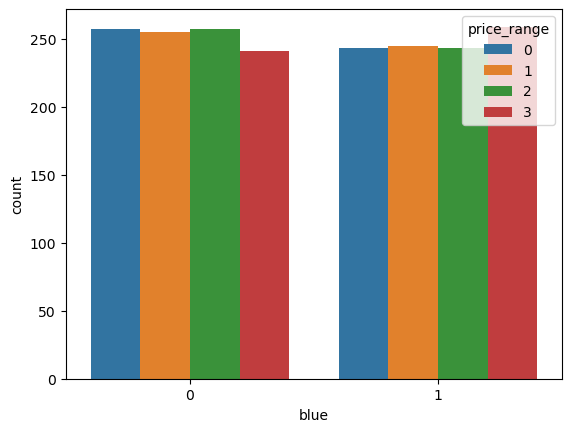

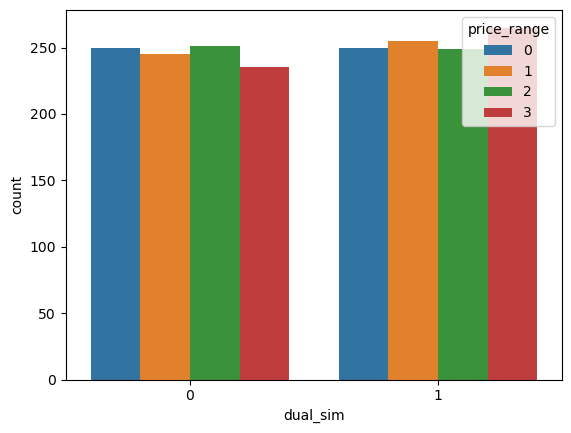

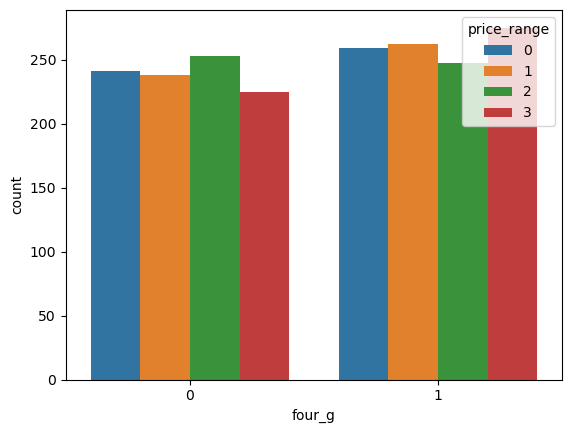

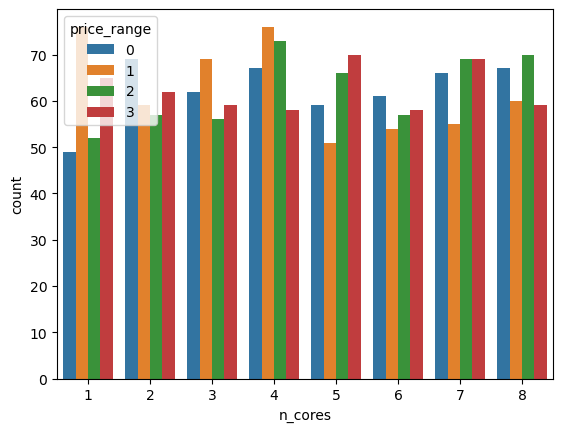

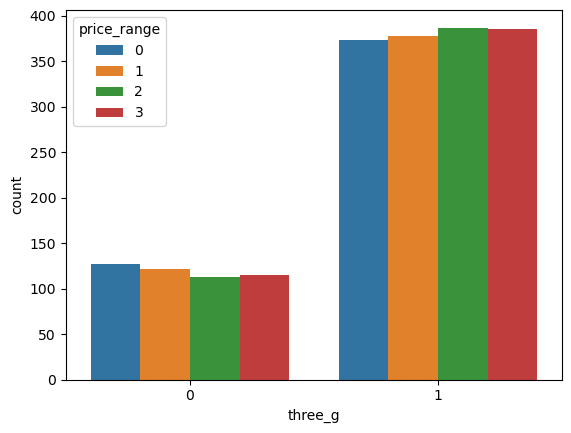

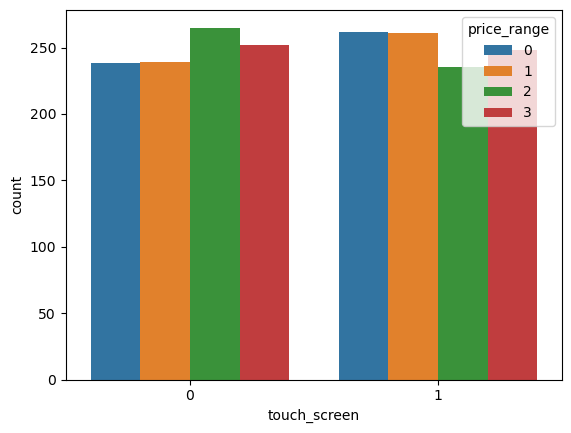

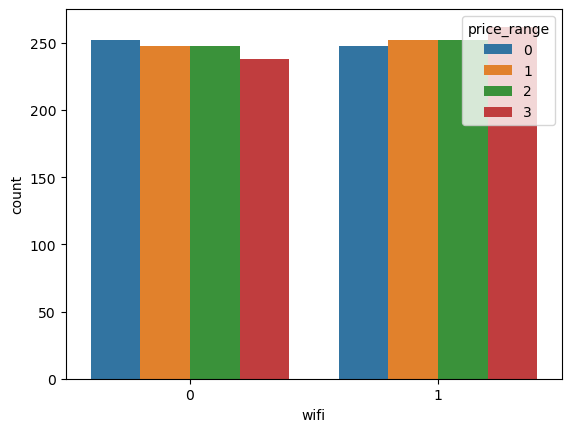

In [21]:
def create_countplothue(x,data):
    ax = sns.countplot(x=x, data=data, hue="price_range")
    plt.show()

    
for feature in ["blue","dual_sim","four_g","n_cores","three_g","touch_screen","wifi"]:
    create_countplothue(x = feature, data = df_t)

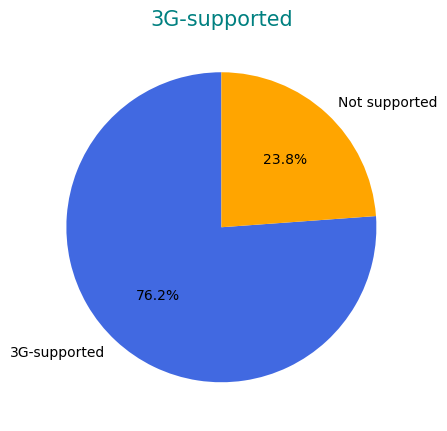

In [22]:
labels = ["3G-supported",'Not supported']
values=df_t['three_g'].value_counts().values
colors = ['royalblue','orange','teal','sandybrown']
plt.figure(figsize = (5,8))
plt.pie(values, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors, startangle=90)
plt.title('3G-supported',color = 'teal',fontsize = 15)
plt.show()

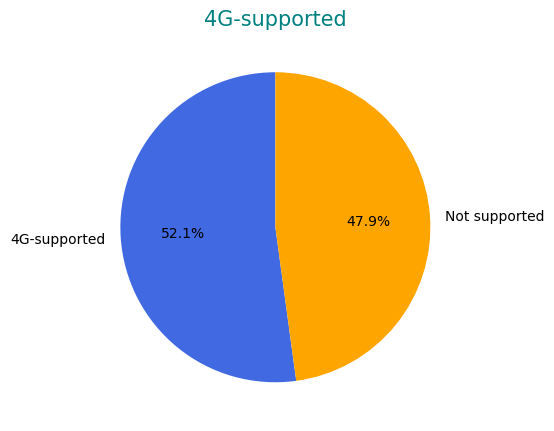

In [23]:
labels = ["4G-supported",'Not supported']
values=df_t['four_g'].value_counts().values
colors = ['royalblue','orange','teal','sandybrown']
plt.figure(figsize = (5,8))
plt.pie(values, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors, startangle=90)
plt.title('4G-supported',color = 'teal',fontsize = 15)
plt.show()

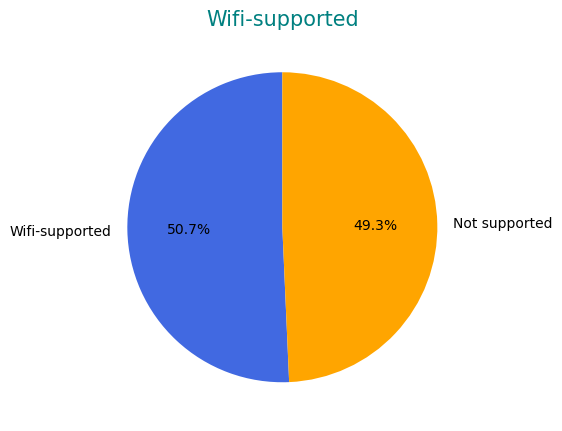

In [24]:
labels = ["Wifi-supported",'Not supported']
values=df_t['wifi'].value_counts().values
colors = ['royalblue','orange','teal','sandybrown']
plt.figure(figsize = (5,8))
plt.pie(values, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors, startangle=90)
plt.title('Wifi-supported',color = 'teal',fontsize = 15)
plt.show()

### Conclusion
- **We see almost the same frequency in terms of having or not having Bluetooth, 4G, two SIM cards, touch screen and the number of processing cores used.**
- **We see a big difference in terms of having or not having 3G.**

**Check the column balanced or imbalanced**

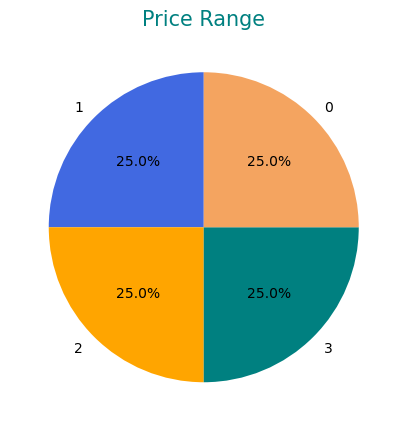

In [25]:
labels = df_t["price_range"].value_counts().index
sizes = df_t["price_range"].value_counts().values
colors = ['royalblue','orange','teal','sandybrown']
plt.figure(figsize = (5,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors, startangle=90)
plt.title('Price Range',color = 'teal',fontsize = 15)
plt.show()

**Mobile phones are divided with the same frequency across the 4 price_range classes. Therefore, the dataset is completely balanced.**

**Correlation with Price Range**

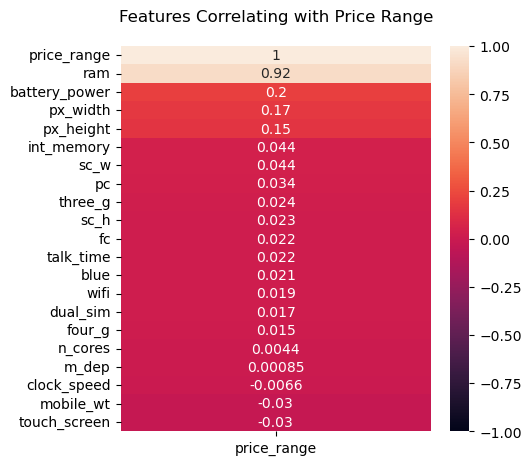

In [26]:
plt.figure (figsize = (5, 5), dpi = 100)
heatmap = sns.heatmap (df_t.corr()[['price_range']].sort_values (by = 'price_range', ascending = False),
                       vmin = -1, vmax = 1, annot = True)
heatmap.set_title ('Features Correlating with Price Range', fontdict = {'fontsize':12}, pad = 18);

**postive features correlating is `ram`, `battery_power`, `px_width` and `px_hight` when the negtive correlation is `touch_screen`, `mobile_wt` and `clock_speed`**

_____________________________________
# Machine Learning Models


## Feature Selection 
> According to the correlation features on `price_range` the top 5 features `ram`, `battery_power`, `px_width` , `px_hight` and `int_memory`

In [27]:
x=df_t[["ram","battery_power","px_height","px_width","int_memory"]]
y=df_t["price_range"]

### Spliting Data

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

____________________________
## Logistic Regression Model

In [29]:
Accuracies= {} # make dictionry to save all accuracies models
from sklearn.linear_model import LogisticRegression

# define model
lg = LogisticRegression()

# parameters
parameters=[{'penalty':['l1','l2'],'C':[0.1,0.4,0.5],'random_state':[0]}]

#define search
search = GridSearchCV(lg, parameters, scoring='accuracy', n_jobs=-1, )

# execute search
result = search.fit(x_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.5375
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'random_state': 0}


C:\Users\Marwan Gamal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Marwan Gamal\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Marwan Gamal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Marwan Gamal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver

In [30]:
lr=LogisticRegression(C=0.4,penalty='l2',random_state=0)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

C:\Users\Marwan Gamal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 54.75%
Logistic TRAIN score with  0.545625
Logistic TEST score with  0.5475

[[73 27  3  2]
 [14 44 18 15]
 [ 0 22 25 45]
 [ 0 12 23 77]]


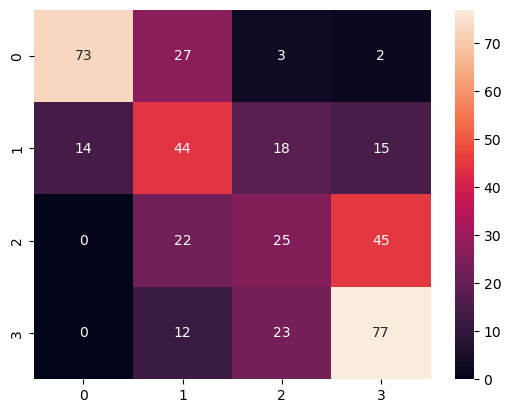

In [31]:
acc = accuracy_score(y_test, y_pred)*100
Accuracies['Logistic Regression'] = acc
print("Accuracy: {:.2f}%".format(acc))
print("Logistic TRAIN score with ",format(lr.score(x_train, y_train)))
print("Logistic TEST score with ",format(lr.score(x_test, y_test)))
print()
co=confusion_matrix(y_test,y_pred)
print(co)
sns.heatmap(co,annot=True)
plt.show()

______________
## KNN Model

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# define model
knn = KNeighborsClassifier()

# parameters
parameters=[{'n_neighbors':np.arange(2,33),'n_jobs':[2,6]}]

# define search
search = GridSearchCV(knn, parameters, scoring='accuracy')

# execute search
result = search.fit(x_train, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9262500000000001
Best Hyperparameters: {'n_jobs': 2, 'n_neighbors': 11}


In [33]:
knn=KNeighborsClassifier(n_jobs=2, n_neighbors=11)
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)

Accuracy: 94.25%
KNN TRAIN score with  0.94625
KNN TEST score with  0.9425

[[102   3   0   0]
 [  2  87   2   0]
 [  0   7  83   2]
 [  0   0   7 105]]


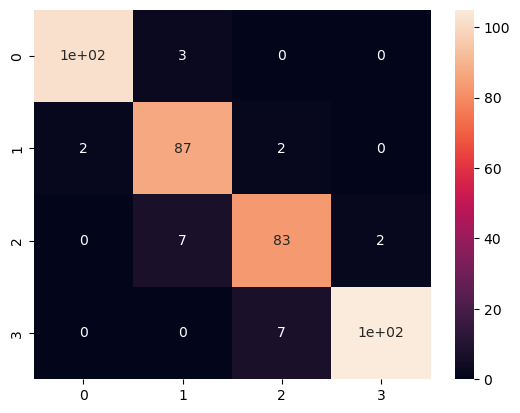

In [34]:
acc = accuracy_score(y_test, y_pred)*100
Accuracies['KNN'] = acc
print("Accuracy: {:.2f}%".format(acc))
print("KNN TRAIN score with ",format(knn.score(x_train, y_train)))
print("KNN TEST score with ",format(knn.score(x_test, y_test)))
print()

co=confusion_matrix(y_test,y_pred)
print(co)
sns.heatmap(co,annot=True)
plt.show()

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       105
           1       0.90      0.96      0.93        91
           2       0.90      0.90      0.90        92
           3       0.98      0.94      0.96       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



_______________________
## SVM Model

In [36]:
from sklearn.svm import SVC

# define model
svc =SVC()

# parameters
parameters = [{'kernel': ['linear'],'random_state': [2]}, {'kernel': ['rbf'],'gamma':[0.9,0.06,0.3],'random_state': [0],
        'C':[1,2,3,4,5,6],'degree':[2], 'probability':[True]}]

# define search
search = GridSearchCV(svc, parameters, scoring='accuracy')

# execute search
result = search.fit(x_train, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9475
Best Hyperparameters: {'kernel': 'linear', 'random_state': 2}


In [37]:
svc=SVC(kernel='linear', random_state=2)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

Accuracy: 96.75%
SVC TRAIN score with  0.95625
SVC TEST score with  0.9675

[[103   2   0   0]
 [  0  91   0   0]
 [  0   5  85   2]
 [  0   0   4 108]]


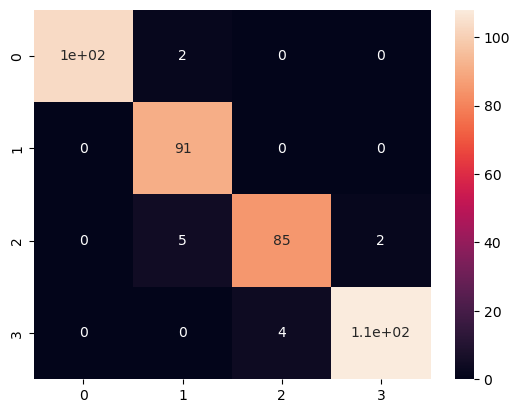

In [38]:
acc = accuracy_score(y_test, y_pred)*100
Accuracies['SVM'] = acc
print("Accuracy: {:.2f}%".format(acc))
print("SVC TRAIN score with ",format(svc.score(x_train, y_train)))
print("SVC TEST score with ",format(svc.score(x_test, y_test)))
print()

co=confusion_matrix(y_test,y_pred)
print(co)
sns.heatmap(co,annot=True)
plt.show()

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.93      1.00      0.96        91
           2       0.96      0.92      0.94        92
           3       0.98      0.96      0.97       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



___________________________
## Random Forest Model

In [40]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100,random_state =0)
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)


Accuracy: 92.50%
Random Forest TRAIN score with  1.0
Random Forest TEST score with  0.925

[[100   5   0   0]
 [  2  87   2   0]
 [  0   7  80   5]
 [  0   0   9 103]]


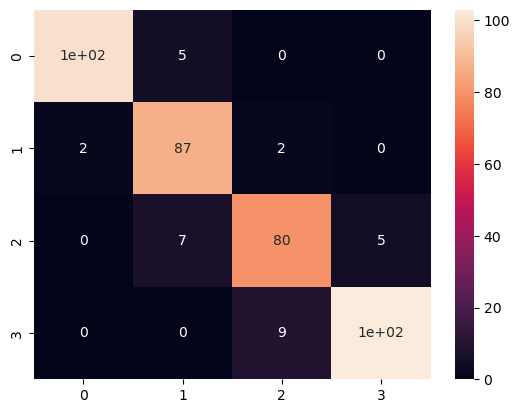

In [41]:
acc = accuracy_score(y_test, y_pred)*100
Accuracies['Random Forest'] = acc
print("Accuracy: {:.2f}%".format(acc))
print("Random Forest TRAIN score with ",format(RF.score(x_train, y_train)))
print("Random Forest TEST score with ",format(RF.score(x_test, y_test)))
print()

co=confusion_matrix(y_test,y_pred)
print(co)
sns.heatmap(co,annot=True)
plt.show()

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       105
           1       0.88      0.96      0.92        91
           2       0.88      0.87      0.87        92
           3       0.95      0.92      0.94       112

    accuracy                           0.93       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.93      0.93      0.93       400



________________________
## Models Accuracy 

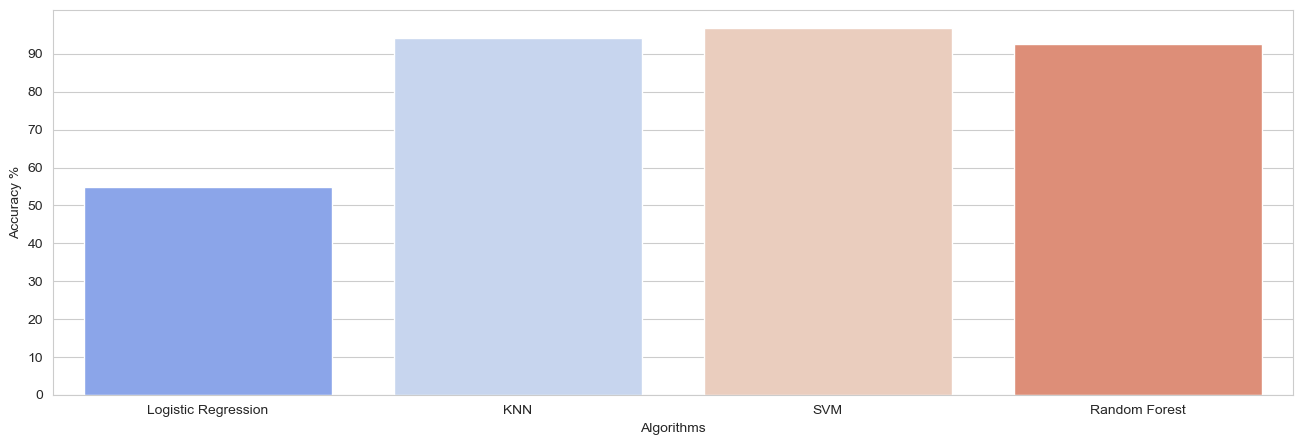

In [43]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(Accuracies.keys()), y=list(Accuracies.values()), palette='coolwarm')
plt.show()

**Best model accuracy is SVM with 96.75%**

_______________________
## Testing

In [44]:
df_test=df_test[["ram","battery_power","px_height","px_width","int_memory"]]

In [45]:
predicted_price=svc.predict(df_test)
predicted_price

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [46]:
df_test['price_range']=predicted_price

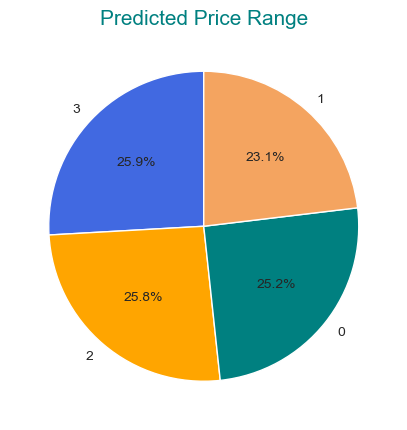

In [47]:
labels = df_test["price_range"].value_counts().index
sizes = df_test["price_range"].value_counts().values
colors = ['royalblue','orange','teal','sandybrown']
plt.figure(figsize = (5,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors, startangle=90)
plt.title('Predicted Price Range',color = 'teal',fontsize = 15)
plt.show()

________________________
## Save the best model 

In [48]:
import pickle
# save the model to disk
filename = 'model.pkl'
pickle.dump(svc, open(filename, 'wb'))